# MQT Qudits 🌌
*Discover a New Dimension in Quantum Computing*

Embark on a journey with MQT Qudits, a cutting-edge toolkit for Mixed-Dimensional Quantum Computing.

<br>
<p>Delve into the realm of mixed-dimensional quantum computing with NeQST—a project funded by the European Union and developed at the <a href="https://www.cda.cit.tum.de/" target="_blank">Chair for Design Automation</a> at the Technical University of Munich, as part of the <a href="https://www.cda.cit.tum.de/research/quantum/mqt/" target="_blank">Munich Quantum Toolkit</a>.</p> Our team is focused on creating design automation methods and software for quDit-based systems. Explore our Jupyter file to discover the initial tools and contributions we've made to advance Quantum Information Processing for Science and Technology.
<img src="foot.png" alt="Logo 1" width="400"/> 




# User Inputs 💻

🚀 **New QASM Extension:**
Dive into a language meticulously designed to express quantum algorithms and circuits. MQT extends the openQASM 2.0 grammar, effortlessly adapting to registers that feature a harmonious mix of qudits and qubits in diverse combinations. 

🐍 **Python Interface** 

Constructing and manipulating quantum programs becomes a breeze with Python. You have the flexibility to:

1. **Initialize Quantum Circuits:** Start by creating your quantum circuits effortlessly.

2. **Create Quantum Registers:** Build dedicated quantum registers tailored to your needs.

3. **Compose Circuits:** Seamlessly bring together your quantum registers, forming a unified and powerful circuit.

4. **Apply Operations:** Easily apply a variety of qudit operations, without worrying about the right representation. 




<img src="2dqed.png" alt="2dqed.png" width="350"/>

In [1]:
from mqt.qudits.qudit_circuits.circuit import QuantumCircuit

In [2]:
qasm = """
        DITQASM 2.0;
        
        qreg fields [3][5,5,5];
        qreg matter [2][2,2];
        
        h fields[2] ctl matter[0] matter[1] [0,0];
        cx fields[2], matter[0];
        cx fields[2], matter[1];
        rxy (0, 1, pi, pi/2) fields[2];
        
        measure q[0] -> meas[0];
        measure q[1] -> meas[1];
        measure q[2] -> meas[2];
        """

In [3]:
circuit = QuantumCircuit()
circuit.from_qasm(qasm)

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")


 Number of operations: 4, 
 Number of qudits in the circuit: 5


##### Let's construct a quantum circuit from scratch.
<br>

In [4]:
from mqt.qudits.qudit_circuits.components.registers.quantum_register import QuantumRegister


circuit = QuantumCircuit()

field_reg = QuantumRegister("fields", 1, [3])
ancilla_reg = QuantumRegister("ancillas", 1, [3])

circuit.append(field_reg)
circuit.append(ancilla_reg)

h = circuit.h(field_reg[0])
csum = circuit.csum([field_reg[0], ancilla_reg[0]])

print(h.to_matrix())
print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")

[[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]]

 Number of operations: 2, 
 Number of qudits in the circuit: 2



##### It is possible to export the code and share your program in a QASM file.
<br>

In [5]:
print(circuit.to_qasm())

DITQASM 2.0;
qreg fields [1][3];
qreg ancillas [1][3];
creg meas[2];
h fields[0];
csum fields[0], ancillas[0];
measure fields[0] -> meas[0];
measure ancillas[0] -> meas[1];



# Simulation 🚀

After crafting your quantum circuit with precision, take it for a spin using two distinct engines, each flaunting its unique set of data structures.

- **External Tensor-Network Simulator:** Delve into the quantum realm with a robust external tensor-network simulator.

- **MiSiM (C++-Powered):** Unleash the power of decision-diagram-based simulation with MiSiM, seamlessly interfaced with Python for a fluid and efficient experience. 🌐💡

In [6]:
from mqt.qudits.simulation.provider.qudit_provider import MQTQuditProvider


provider = MQTQuditProvider()
provider.backends("sim")

['tnsim', 'misim']

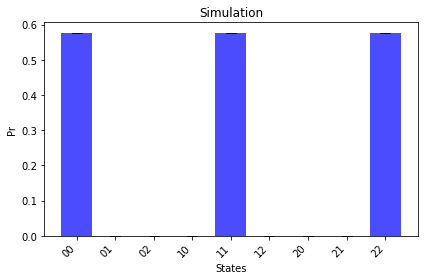

In [7]:
from mqt.qudits.visualisation.plot_information import plot_counts, plot_state

backend = provider.get_backend("tnsim")

job = backend.run(circuit)
result = job.result()

state_vector = result.get_state_vector()

plot_state(state_vector, circuit)

# Compilation ⚙️

Emulate the features of the best experimental laboratories in your compilation process. Leverage modern compiler passes to customize optimization, gate decomposition, and noise-aware strategies, creating compiled circuits that closely resemble the challenges and advantages of cutting-edge quantum hardware.

Customize, compile, and push the boundaries of quantum algorithms with a tailored approach to quantum compilation. 🛠️🔧🚀


In [8]:
from mqt.qudits.compiler.dit_manager import QuditManager

backend_ion = provider.get_backend("faketraps2trits", shots=1000)

qudit_compiler = QuditManager()

passes = ["LocQRPass"]

compiled_circuit_qr = qudit_compiler.compile(backend_ion, circuit, passes)

print(f"\n Number of operations: {len(compiled_circuit_qr.instructions)}, \n Number of qudits in the circuit: {compiled_circuit_qr.num_qudits}")


 Number of operations: 10, 
 Number of qudits in the circuit: 2


### Extending Simulation with Noise Model Integration

Introduce realism into your simulations by incorporating a noise model. Simulate the effects of environmental factors and imperfections, bringing your quantum algorithms closer to real-world scenarios.

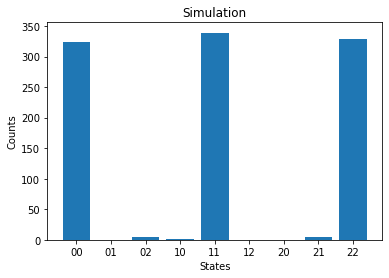

{'00': 323,
 '01': 0,
 '02': 4,
 '10': 2,
 '11': 339,
 '12': 0,
 '20': 0,
 '21': 4,
 '22': 328}

In [9]:
job = backend_ion.run(compiled_circuit_qr)
result = job.result()
counts = result.get_counts()

plot_counts(counts, compiled_circuit_qr)